In [3]:
# ライブラリの読み込み
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# グラフをインラインで表示させる
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
pdp.ProfileReport(train)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


使用する特徴量を  
 TotalBsmtSF(38)  
 1stFlrSF(43)  
 GrLivArea(46)  
 GarageArea(62)  
  
  
 BsmtFinSF1(34)  
 2ndFlrSF(44)  
 GarageYrBlt(59)  
 YearBuilt(19)

In [8]:
train_col = [
       'OverallQual',
       'TotalBsmtSF',
       '1stFlrSF',
       'GrLivArea',
       'GarageArea',
       'GarageCars',
       'SalePrice'
      ]

In [9]:
# 特徴量の選択
train=train.loc[:,train_col]

In [10]:
train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,GarageCars,SalePrice
0,7,856,856,1710,548,2,208500
1,6,1262,1262,1262,460,2,181500
2,7,920,920,1786,608,2,223500
3,7,756,961,1717,642,3,140000
4,8,1145,1145,2198,836,3,250000


In [11]:
train.dtypes

OverallQual    int64
TotalBsmtSF    int64
1stFlrSF       int64
GrLivArea      int64
GarageArea     int64
GarageCars     int64
SalePrice      int64
dtype: object

In [12]:
train = train.dropna()

In [13]:
Counter(train['KitchenQual'])

KeyError: 'KitchenQual'

In [ ]:
train['BsmtQual'] = train['BsmtQual'].replace({'Ex' : 0, 'Fa' : 1, 'Gd' : 2, 'TA' : 3}) 
train['ExterQual'] = train['ExterQual'].replace({'Ex' : 0, 'Fa' : 1, 'Gd' : 2, 'TA' : 3}) 
train['KitchenQual'] = train['KitchenQual'].replace({'Ex' : 0, 'Fa' : 1, 'Gd' : 2, 'TA' : 3}) 

In [ ]:
for i in ['BsmtQual', 'OverallQual', 'TotRmsAbvGrd', 'ExterQual', 'KitchenQual']:
    train = pd.get_dummies(train, columns=[i])

In [ ]:
train_x, train_y = train.drop("SalePrice", axis=1),  train.SalePrice

In [ ]:
scaler.fit(train_x)

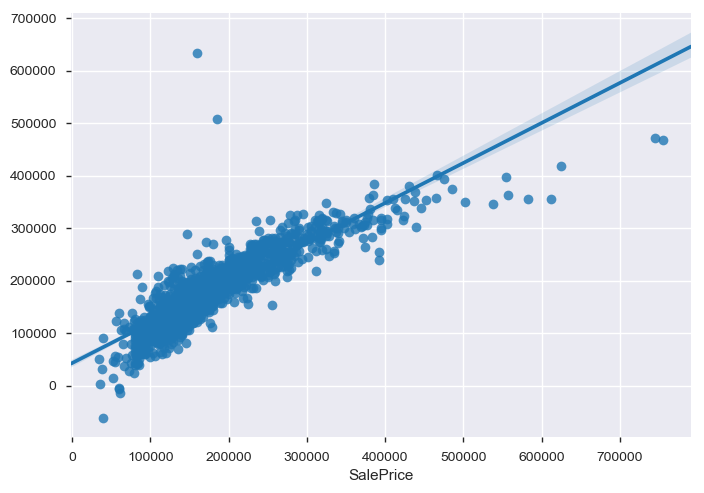

In [811]:
clf =LinearRegression()
clf.fit(train_x, train_y)

import statsmodels.api as sm
model = sm.OLS(train_y, train_x)
results = model.fit()
results.summary()

sns.regplot(train_y,clf.predict(train_x))

In [812]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4598.
Date:                Thu, 28 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:52:48   Log-Likelihood:                -17689.
No. Observations:                1460   AIC:                         3.539e+04
Df Residuals:                    1454   BIC:                         3.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  8802.8803    917.234      9.597      0.000    7003.637    1.06e+04
TotalBsmtSF    45.6489      4.786      9.538      0.000      36.261      55.037
1stFlrSF      -23.3955      5.421     -4.316      0.000     -34.029     -12.762
GrLivArea      45.7319      3.052     14.983      0.000      39.745      51.719
GarageArea     25.0206     11.936      2.096      0.036       1.608      48.433
GarageCars   1.665e+04   3440.651      4.841      0.000    9905.578    2.34e+04
==============================================================================
Omnibus:                      606.640   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16755.923
Skew:                           1.337   Prob(JB):                         0.00
Kurtosis:                      19.380   Cond. No.                     6.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [813]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [826]:
rmse(clf.predict(train_x),train_y)

38749.621260535234

In [827]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [852]:
test_col = [
       'OverallQual',
       'TotalBsmtSF',
       '1stFlrSF',
       'GrLivArea',
       'GarageArea',
       'GarageCars'
      ]

In [853]:
x_test = test.loc[:,test_col]

In [854]:
x_test.isnull().sum()

OverallQual    0
TotalBsmtSF    1
1stFlrSF       0
GrLivArea      0
GarageArea     1
GarageCars     1
dtype: int64

In [846]:
x_test = x_test.astype({'TotalBsmtSF': int, 'GarageArea': int, 'GarageCars':int})

In [847]:
x_test.dtypes

OverallQual    int64
TotalBsmtSF    int64
1stFlrSF       int64
GrLivArea      int64
GarageArea     int64
GarageCars     int64
dtype: object

In [855]:
x_test = x_test.fillna({'BsmtQual' :'NA',
                   'TotalBsmtSF' : 0,
                    'GarageArea' : 0,
                    'GarageCars' : 0
                   })

In [584]:
x_test['BsmtQual'] = x_test['BsmtQual'].replace({'Ex' : 0, 'Fa' : 1, 'Gd' : 2, 'TA' : 3, 'NA':3}) 
x_test['ExterQual'] = x_test['ExterQual'].replace({'Ex' : 0, 'Fa' : 1, 'Gd' : 2, 'TA' : 3}) 
x_test['KitchenQual'] = x_test['KitchenQual'].replace({'Ex' : 0, 'Fa' : 1, 'Gd' : 2, 'TA' : 3}) 

In [585]:
x_test.columns

Index(['BsmtQual', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'ExterQual',
       '1stFlrSF', 'GrLivArea', 'GarageArea', 'KitchenQual'],
      dtype='object')

In [556]:
for i in ['BsmtQual', 'OverallQual', 'TotRmsAbvGrd', 'ExterQual', 'KitchenQual']:
    x_test = pd.get_dummies(x_test, columns=[i])

In [820]:
train.shape, x_test.shape

((1460, 7), (1459, 6))

In [845]:
x_test.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,GarageCars
0,5,882.0,896,896,730.0,1.0
1,6,1329.0,1329,1329,312.0,1.0
2,5,928.0,928,1629,482.0,2.0
3,6,926.0,926,1604,470.0,2.0
4,8,1280.0,1280,1280,506.0,2.0


In [588]:
train.head()

,BsmtQual,OverallQual,TotRmsAbvGrd,TotalBsmtSF,ExterQual,1stFlrSF,GrLivArea,GarageArea,KitchenQual,SalePrice
0,2,7,8,856,2,856,1710,548,2,208500
1,2,6,6,1262,3,1262,1262,460,3,181500
2,2,7,6,920,2,920,1786,608,2,223500
3,3,7,7,756,3,961,1717,642,2,140000
4,2,8,9,1145,2,1145,2198,836,2,250000


In [856]:
y_pred = clf.predict(x_test)

In [857]:
df_test_id  =test['Id']

In [858]:
pred_df = pd.DataFrame(y_pred, index=df_test_id,columns=["SalePrice"])
pred_df.to_csv('./output.csv', header=True, index_label='Id')

In [744]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [11]:
saleprice = train.SalePrice

In [730]:
data = pd.concat([train.drop("SalePrice", axis=1), test])

In [731]:
for i in data.columns:
    if data[i].isnull().sum() > 1:
        data = data.drop(i, axis=1)

In [732]:
data.shape

(2919, 57)

In [733]:
data=pd.get_dummies(data)
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [734]:
data.shape

(2919, 205)

In [735]:
train, test = Dr_age = data.query('Id <= 1460'), data.query('Id >= 1461')

In [715]:
train = pd.concat([train, saleprice], axis = 1)

In [717]:
corrmat = train.corr()
corrmat

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,-0.087162,-0.013098,0.036178,0.048347,-0.015130,-0.026277,-0.007929,0.041207,-0.085761,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,0.249236,-0.002593,-0.198960,-0.023821,-0.034618,-0.059130,0.021534,-0.153930,0.249315,0.214479


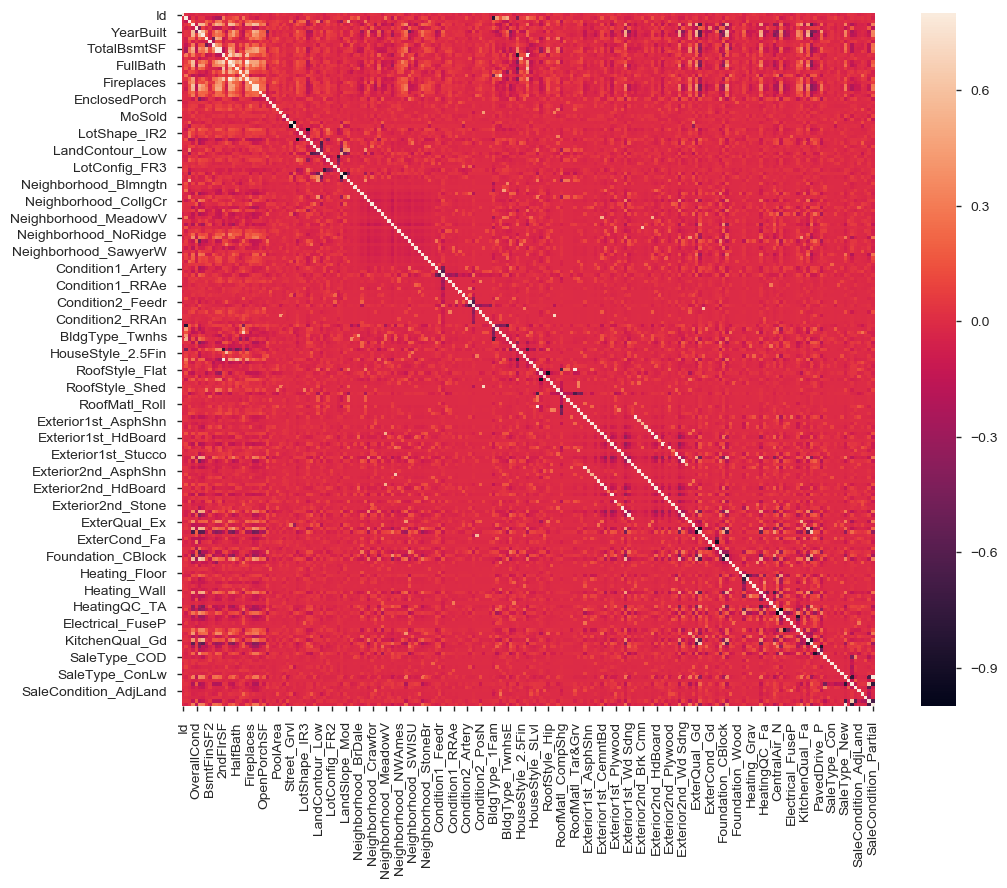

In [695]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

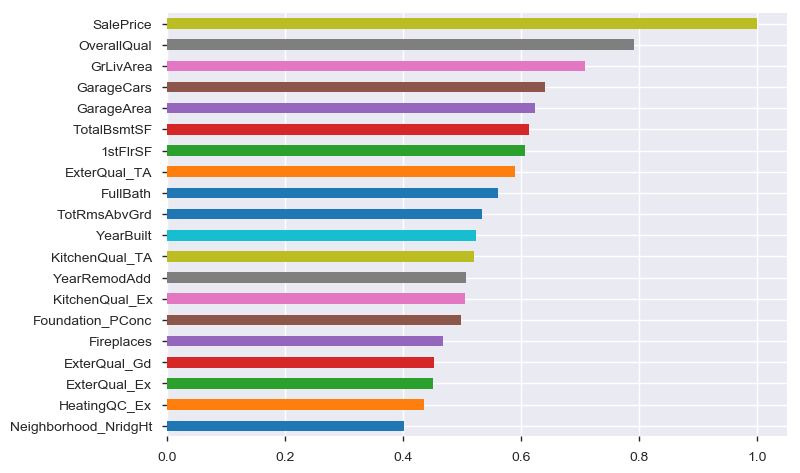

In [743]:
corrmat['SalePrice'] = abs(corrmat['SalePrice'])
ana_list = corrmat['SalePrice'].sort_values().tail(20)
ana_list.plot(kind='barh')

In [2]:
import lightgbm

/Users/sudatakamune/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
lightgbm

<module 'lightgbm' from '/Users/sudatakamune/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py'>

In [5]:
train.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
        ... 
1430    2005
1431    1976
1432    1927
1433    2000
1434    1977
1435    1962
1436    1971
1437    2008
1438    1957
1439    1979
1440    1922
1441    2004
1442    2008
1443    1916
1444    2004
1445    1966
1446    1962
1447    1995
1448    1910
1449    1970
1450    1974
1451    2008
1452    2005
1453    2006
1454    2004
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [9]:
a =  train.YrSold - train.YearBuilt

In [12]:
data = pd.concat([a, saleprice], axis = 1)

In [27]:
data = data.rename(columns={0: 'a'})

In [28]:
data

,a,SalePrice
0,5,208500
1,31,181500
2,7,223500
3,91,140000
4,8,250000
5,16,143000
6,3,307000
7,36,200000
8,77,129900
9,69,118000


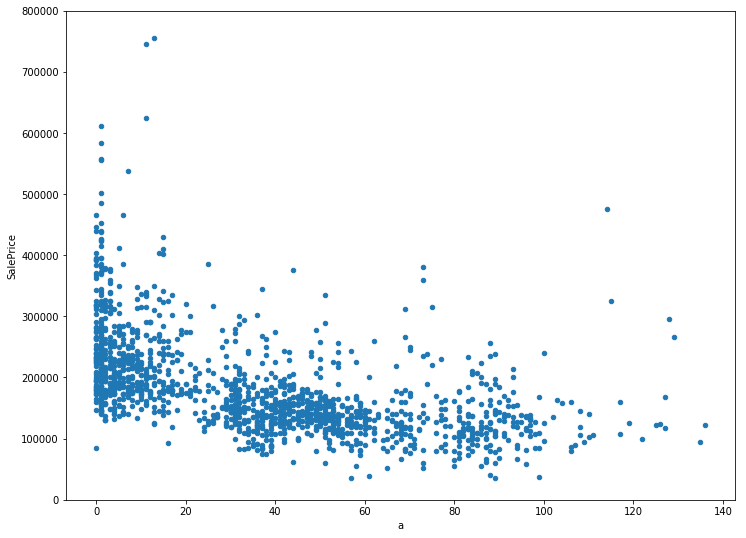

In [30]:
data = pd.concat([data['a'], data['SalePrice']], axis=1)
data.plot.scatter(x='a', y='SalePrice', ylim=(0,800000),figsize=(12,9))

In [25]:
data[0] = data['year']

KeyError: 'year'

In [15]:
corrmat = data.corr()
corrmat

,0,SalePrice
0,1.00000,-0.52335
SalePrice,-0.52335,1.00000


In [40]:
df_train = pd.read_csv('./train.csv')

In [41]:
df_train['SalePrice'].describe()
df_y=df_train['SalePrice']
df_y.head()
df_train_shrinked=df_train.loc[:,['GrLivArea','YearBuilt','OverallCond','BsmtQual']]
df_x=df_train_shrinked
df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
df_x=pd.get_dummies(df_x)

In [14]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [177]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, df_x.values, df_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [87]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=10, max_depth = 3,
                              learning_rate=0.1, n_estimators=56,
                              max_bin = 40, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.9,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

In [78]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [319]:
def preprocess(train_flg):
    # train set の場合の処理
    if train_flg:
        df=pd.read_csv('./train.csv')
    else:
        df=pd.read_csv('./test.csv')
    # 使う変数を定義
    var_list = ["SaleType","SaleCondition","GarageFinish","LotArea","BsmtQual","HeatingQC","FireplaceQu","SalePrice","ExterQual","KitchenQual","OverallQual","TotRmsAbvGrd","TotalBsmtSF","1stFlrSF","GrLivArea","Neighborhood", "year"]
    
    
#     新たな変数
    df['year'] =  df['YrSold'] - df['YearBuilt']

    
    df_x = df.loc[:,var_list]
    
    print(df_x.isnull().sum())
    
    
    #欠損値　-> 'NA'　に変換
    df_x.loc[df_x['GarageFinish'].isnull()==True,'GarageFinish']='Na'
    df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='Na'
    df_x.loc[df_x['FireplaceQu'].isnull()==True,'FireplaceQu']='Na'
    df_x.loc[df_x['TotalBsmtSF'].isnull()== True,'TotalBsmtSF']= 0
    df_x.loc[df_x['KitchenQual'].isnull()== True,'KitchenQual']= 'Fa'
    df_x.loc[df_x['SaleType'].isnull()== True,'SaleType']= 'WD'
    #df_x.loc[df_x['GarageArea'].isnull()== True,'GarageArea'] = 412
    
    #print(df_x["SaleType"])
    
    
    #グルーピング
    
#     df_x.loc[df_x['BsmtQual'] == "TA",'BsmtQual']='Fa'
#     df_x.loc[df_x['BsmtQual'] == "Gd",'BsmtQual']='Ex'
#     df_x.loc[df_x['ExterQual'] == "Gd",'ExterQual']='Ex'
#     df_x.loc[df_x['ExterQual'] == "TA",'ExterQual']='Fa'
#     df_x.loc[df_x['KitchenQual'] == "TA",'KitchenQual']='Fa'
#     df_x.loc[df_x['KitchenQual'] == "Gd",'KitchenQual']='Ex'
    
#     df_x.loc[df_x["TotRmsAbvGrd"] < 6.5 , "TotRmsAbvGrd"] = 0
#     df_x.loc[df_x["TotRmsAbvGrd"] >= 6.5 , "TotRmsAbvGrd"] = 1
    
    #print(df_x["TotRmsAbvGrd"])
    
    
    #外れ値削除
    
    #if train_flg:
        #df_x.drop(df_x[df_x['TotalBsmtSF'] >= 5000].index,inplace=True)
        #df_x.drop(df_x[df_x['GrLivArea'] >= 3000].index,inplace=True)
        #df_x.drop(df_x[df_x['GarageArea'] >= 1200].index,inplace=True)
        #df_x.drop(df_x[df_x['SalePrice'] >= 500000].index,inplace=True)
        #df_x.drop(df_x[df_x['LotArea'] >= 50000.index,inplace = True])
    
    
    #df_x.loc[df_x['Fireplaces'] == 2 ,'Fireplaces']= 1
    #df_x.loc[df_x['Fireplaces'] == 3 ,'Fireplaces']= 1
    
    #Sprint(df_x['FireplaceQu'])
    
    df_x.loc[df_x['Neighborhood'] == "MeadowV",'Neighborhood']= "A"
    df_x.loc[df_x['Neighborhood'] == "IDOTRR",'Neighborhood']= "A"
    df_x.loc[df_x['Neighborhood'] == "BrDale",'Neighborhood']= "A"
    
    df_x.loc[df_x['Neighborhood'] == "BrkSide",'Neighborhood']= "B"
    df_x.loc[df_x['Neighborhood'] == "Edwards",'Neighborhood']= "B"
    df_x.loc[df_x['Neighborhood'] == "OldTown",'Neighborhood']= "B"
    
    df_x.loc[df_x['Neighborhood'] == "Sawyer",'Neighborhood']= "C"
    df_x.loc[df_x['Neighborhood'] == "Blueste",'Neighborhood']= "C"
    
    df_x.loc[df_x['Neighborhood'] == "SWISU",'Neighborhood']= "D"
    df_x.loc[df_x['Neighborhood'] == "NPkVill",'Neighborhood']= "D"
    df_x.loc[df_x['Neighborhood'] == "NAmes",'Neighborhood']= "D"
    
    df_x.loc[df_x['Neighborhood'] == "Mitchel",'Neighborhood']= "E"
    
    df_x.loc[df_x['Neighborhood'] == "SawyerW",'Neighborhood']= "F"
    df_x.loc[df_x['Neighborhood'] == "NWAmes",'Neighborhood']= "F"
    
    df_x.loc[df_x['Neighborhood'] == "Gilbert",'Neighborhood']= "G"
    df_x.loc[df_x['Neighborhood'] == "Blmngtn",'Neighborhood']= "G"
    df_x.loc[df_x['Neighborhood'] == "CollgCr",'Neighborhood']= "G"
    
    df_x.loc[df_x['Neighborhood'] == "ClearCr",'Neighborhood']= "H"
    df_x.loc[df_x['Neighborhood'] == "Crawfor",'Neighborhood']= "H"
    
    df_x.loc[df_x['Neighborhood'] == "Somerst",'Neighborhood']= "I"
    df_x.loc[df_x['Neighborhood'] == "Veenker",'Neighborhood']= "I"
    df_x.loc[df_x['Neighborhood'] == "Timber",'Neighborhood']= "I"
    
    df_x.loc[df_x['Neighborhood'] == "StoneBr",'Neighborhood']= "J"
    df_x.loc[df_x['Neighborhood'] == "NridgHt",'Neighborhood']= "J"
    df_x.loc[df_x['Neighborhood'] == "NoRidge",'Neighborhood']= "J"
    
    df_y = df_x['SalePrice']
    
    df_x = df_x.drop("SalePrice",axis = 1)
    
    
    
    
    
    # dummy
    df_x = pd.get_dummies(df_x)

    # train set の場合のoutput
    if train_flg:
        return df_x,df_y
    # test set の場合のoutput、kaggleへ提出するファイルの規定により、idも一緒に出力する
    else:
        df_x["HouseStyle_2.5Fin"] = 0
        return df_x,df['Id']



In [320]:
model = lgb.LGBMRegressor(objective='regression',num_leaves = 5, max_depth = 3,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11,
                              lambda_l1 = 0.5, lambda_l2 = 0.5)

df_x, df_y =preprocess(train_flg =True)
#print(df_x.head())
print(df_x.columns)
model.fit(df_x, df_y)
train_prediction = model.predict(df_x)
#prediction = np.expm1(model.predict(df_x.values))
print(rmsle(df_y, train_prediction))
# print(prediction)

SaleType           0
SaleCondition      0
GarageFinish      81
LotArea            0
BsmtQual          37
HeatingQC          0
FireplaceQu      690
SalePrice          0
ExterQual          0
KitchenQual        0
OverallQual        0
TotRmsAbvGrd       0
TotalBsmtSF        0
1stFlrSF           0
GrLivArea          0
Neighborhood       0
year               0
dtype: int64
Index(['LotArea', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'year', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'GarageFinish_Fin',
       'GarageFinish_Na', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Na',
       'BsmtQual_TA', 'HeatingQC_Ex', 'HeatingQC_

In [321]:
df_x, df_y = preprocess(train_flg=False)
#print(df_x.head())
print(df_x.columns)

SaleType            1
SaleCondition       0
GarageFinish       78
LotArea             0
BsmtQual           44
HeatingQC           0
FireplaceQu       730
SalePrice        1459
ExterQual           0
KitchenQual         1
OverallQual         0
TotRmsAbvGrd        0
TotalBsmtSF         1
1stFlrSF            0
GrLivArea           0
Neighborhood        0
year                0
dtype: int64
Index(['LotArea', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'year', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'GarageFinish_Fin',
       'GarageFinish_Na', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Na',
       'BsmtQual_TA', 'HeatingQC

F:\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [322]:
test_prediction = model.predict(df_x)
#print(test_prediction)

ValueError: Number of features of the model must match the input. Model n_features_ is 60 and input n_features is 61 

In [323]:
submission = pd.DataFrame({'Id': df_y, 'SalePrice': test_prediction})
print(submission)
submission.to_csv('submission6.csv', index=False)

        Id      SalePrice
0     1461  130104.290141
1     1462  156941.742822
2     1463  182393.086600
3     1464  168017.689860
4     1465  174974.544199
5     1466  172539.398926
6     1467  160724.868493
7     1468  170243.572249
8     1469  159497.244707
9     1470  123472.045691
10    1471  158360.981728
11    1472  112922.558139
12    1473  106035.095382
13    1474  128420.294723
14    1475  124893.999355
15    1476  311208.594013
16    1477  231858.636076
17    1478  258421.641195
18    1479  246425.590158
19    1480  368888.086747
20    1481  271501.279264
21    1482  185378.112853
22    1483  144505.486343
23    1484  140640.576881
24    1485  149716.771199
25    1486  166472.322965
26    1487  277916.589065
27    1488  223599.988217
28    1489  184613.117313
29    1490  195309.228699
...    ...            ...
1429  2890  108667.919895
1430  2891  141374.834883
1431  2892   88872.089183
1432  2893  117591.726589
1433  2894   93105.311174
1434  2895  225003.786193
1435  2896  